In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import model_based_agent as mba

In [2]:
def load_data(folder,iters_completed):
    # Loads data while things are still running. To check up on progress
    trajs = []
    evals,mods = [],[]
    for i in range(iters_completed):
        with open(folder+f'collect{i}.pkl','rb') as f:
            trajs.append(pickle.load(f))
        for j in range(3):
            evals.append([[] for _ in range(3)])
            mods.append([[] for _ in range(3)])
            with open(folder+f'eval{i}_{j}.pkl','rb') as f:
                evals[i][j] = pickle.load(f)
            with open(folder+f'mod{i}_{j}.pkl','rb') as f:
                mods[i][j] = pickle.load(f)
    return trajs,evals,mods

def print_rewards(evals,trajs,ind,lp_vec=[1/2,1/3,1/4]):
    print('Evaluation rewards:')
    for i in range(3):
        print('\tLP_frac',np.round(lp_vec[i],2),': ',np.round(np.mean(evals[ind][i]['reward']),2))
    print('Random trajectory reward:')
    print('\t',np.round(np.mean(trajs[ind]['reward']),2))

def plot_mods(models,vmin=None,vmax=None):
    fig,ax = plt.subplots(len(models),7)
    fig.set_size_inches((15,2*len(models)))
    for m,mod in enumerate(models):
        for i,(key,item) in enumerate(mod.items()):
            if i<4:
                img = ax[m,i].imshow(item[:,:,0],vmin=-180,vmax=180)
            else:
                img = ax[m,i].imshow(item[:,:,0],vmin=vmin,vmax=vmax)
            fig.colorbar(img,ax=ax[m,i])
            ax[m,i].axis('off')
            if m==0:
                ax[m,i].set_title(f'{len(models)} models: {key}')
        ax[m,6].imshow(np.sign(mod['reward_on']-mod['reward_off'])[:,:,0],vmin=-1,vmax=1)

In [3]:
trajs,evals,mods = load_data('Data/Run15-01-16-24/', 3)

In [96]:
print_rewards(evals,trajs,0)

Evaluation rewards:
	LP_frac 0.5 :  -0.17
	LP_frac 0.33 :  0.07
	LP_frac 0.25 :  -0.4
Random trajectory reward:
	 -0.11


In [100]:
print_rewards(evals,trajs,2)

Evaluation rewards:
	LP_frac 0.5 :  0.02
	LP_frac 0.33 :  0.01
	LP_frac 0.25 :  0.0
Random trajectory reward:
	 0.03


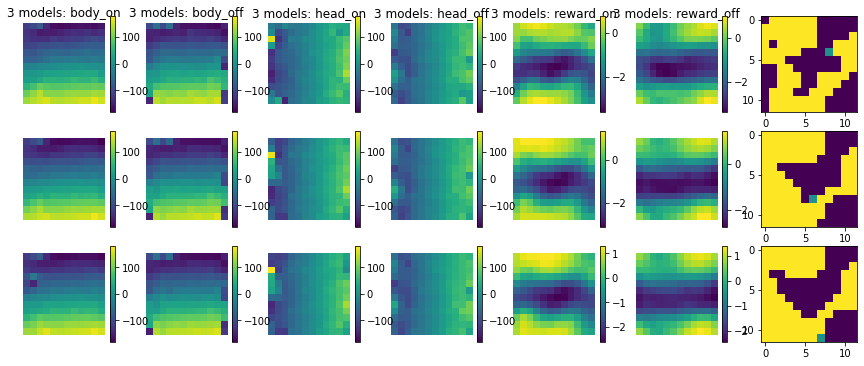

In [101]:
mods_plt = [mods[0][0],mods[1][0],mods[2][0]]
plot_mods(mods_plt)

In [8]:
trajs[2].keys()

dict_keys(['loc', 't', 'endpts', 'obs', 'reward', 'target', 'action'])

In [20]:
obs = np.zeros((len(trajs[2]['obs']),2))
locs = np.zeros((len(trajs[2]['loc']),2))
for i,ob in enumerate(trajs[2]['obs']):
    obs[i,:] = ob*180
    locs[i,:] = trajs[2]['loc'][i]
obs.shape

(3367, 2)

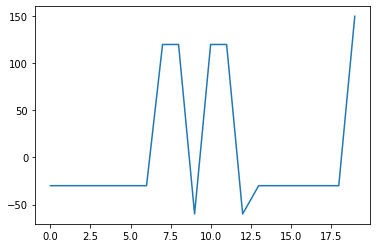

In [31]:
plt.plot(obs[:20,0])

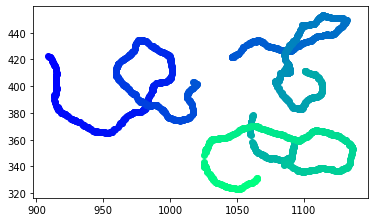

In [39]:
NPOINTS = 2000
fig,ax = plt.subplots(1)

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in range(NPOINTS-1):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')

In [28]:
dh = mba.DataHandler()
dh.

3367